Lane Detection
===
Execution of Lane Detection via Image Pre-processing and Information Extraction

In [39]:
import cv2
import os
import numpy as np

import sys
sys.path.append('../')

import general_utils
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [18, 6]

def mathplot_display_concatenated(name, images, alignment="h"):
    if alignment == "v":
        images = cv2.vconcat(images) if isinstance(images, list) else images
    else:
        images = cv2.hconcat(images) if isinstance(images, list) else images
    
    plt.title(name)
    plt.imshow(cv2.cvtColor(images, cv2.COLOR_BGR2RGB))
    plt.figure()

    return images

Image Import
===
3 files in total (sd1, sd2, sd3)

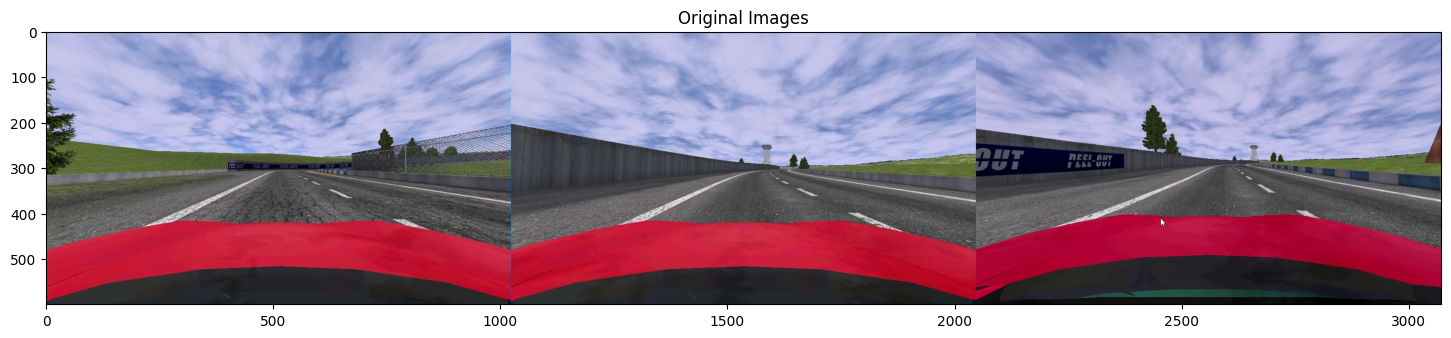

<Figure size 1800x600 with 0 Axes>

In [40]:
original_images = []
file_paths = ["road-images/sd1.jpg","road-images/sd2.jpg","road-images/sd3.jpg"]
for file_path in file_paths:
    original_images.append(cv2.imread(file_path))

print_ = mathplot_display_concatenated("Original Images", original_images, "h")

Color Space Testing
===
To Select best Color Space for Information Extraction

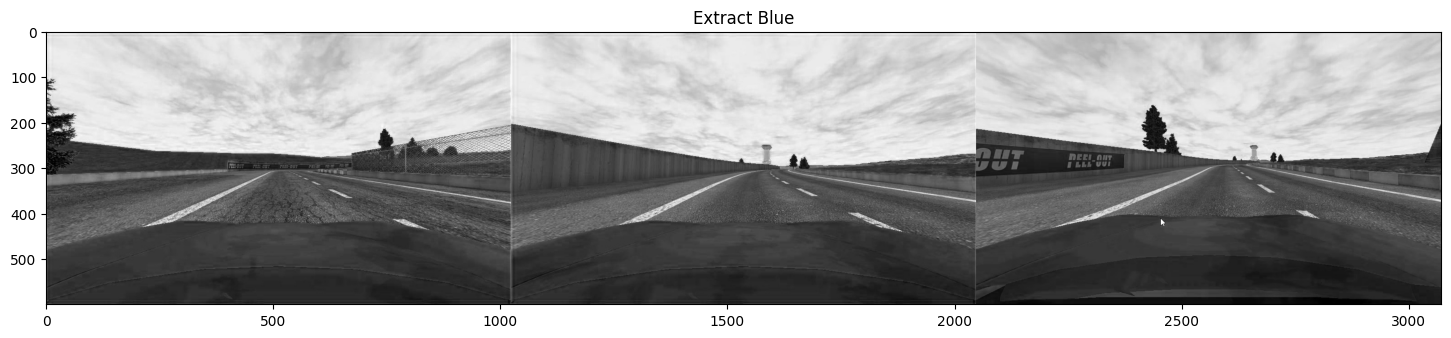

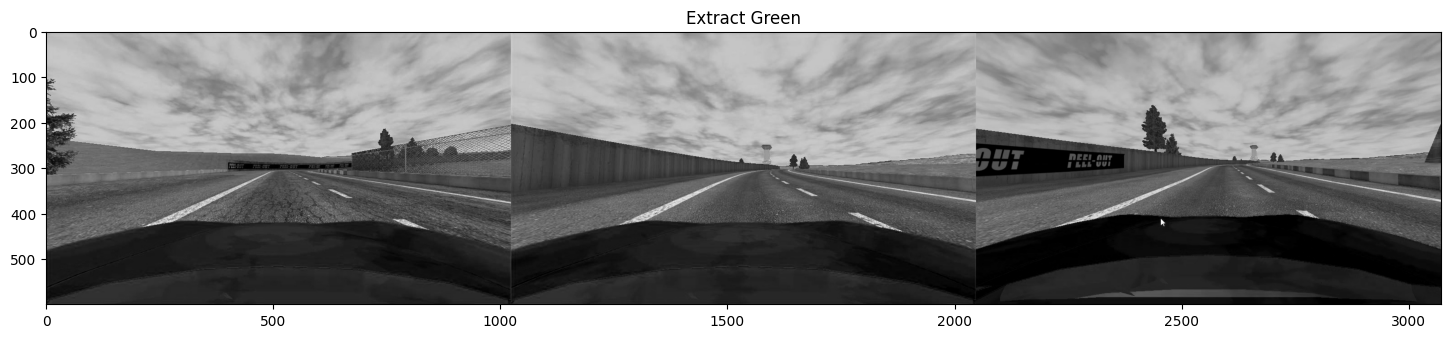

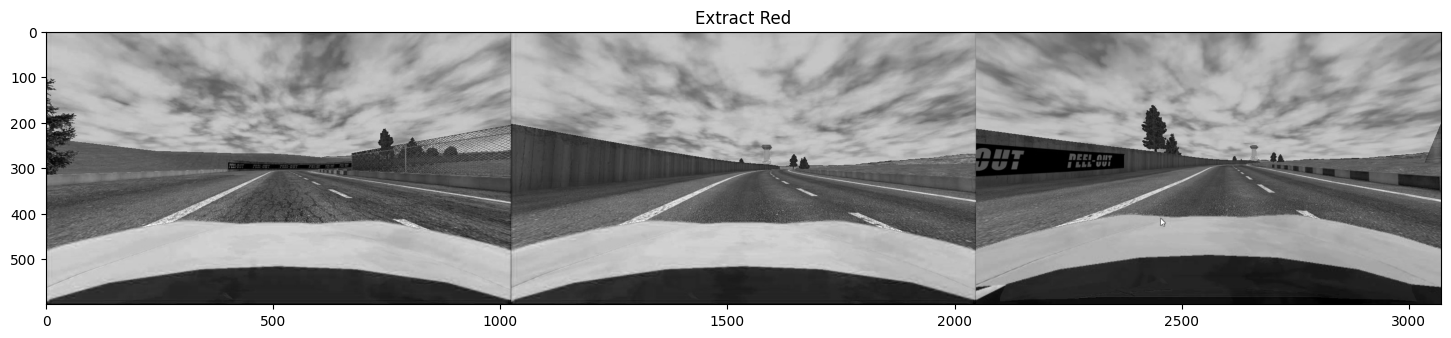

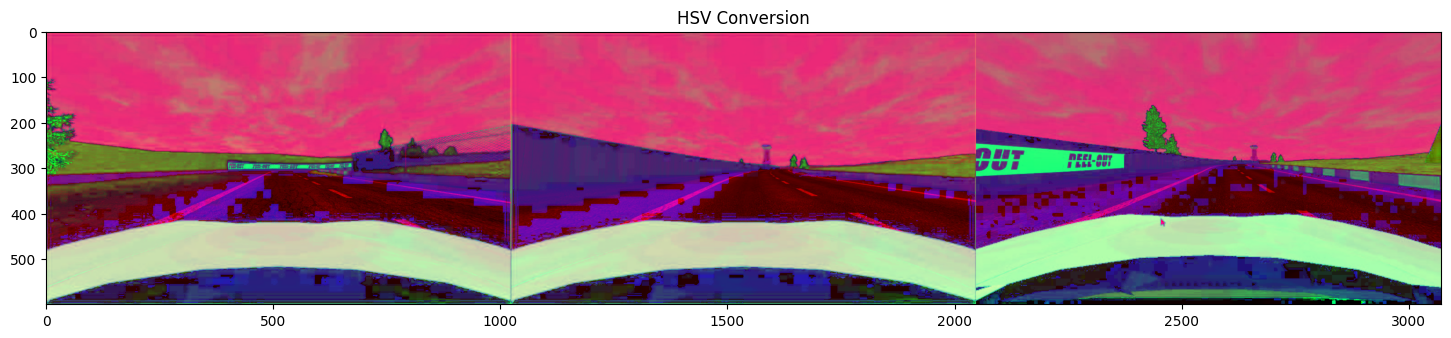

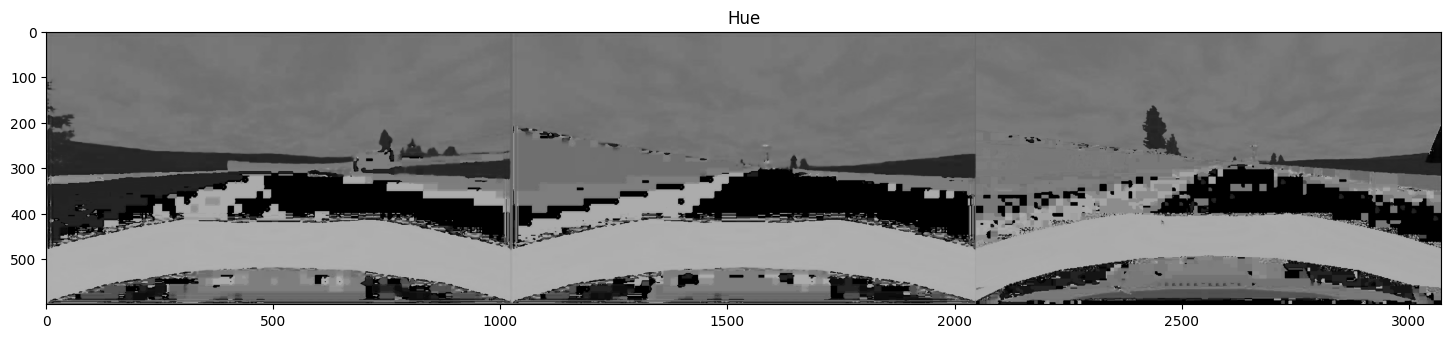

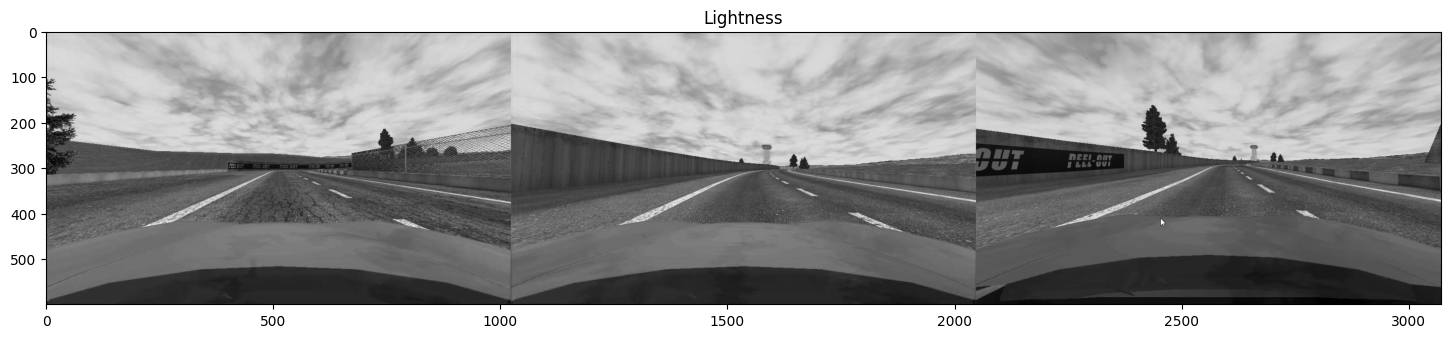

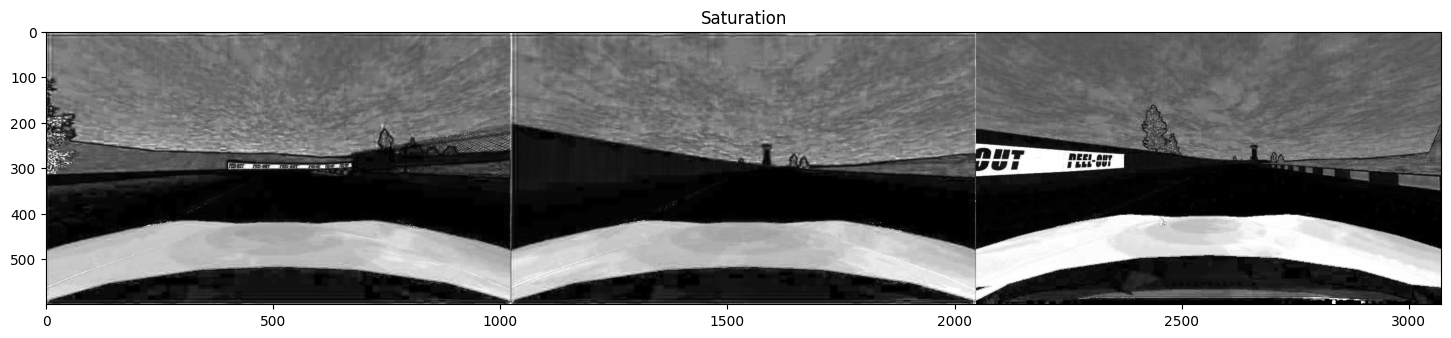

<Figure size 1800x600 with 0 Axes>

In [41]:
images = original_images.copy()

# BGR Extraction
blue_channel = [image[:,:,0] for image in images]
print_ = mathplot_display_concatenated("Extract Blue", blue_channel, "h")

green_channel = [image[:,:,1] for image in images]
print_ = mathplot_display_concatenated("Extract Green", green_channel, "h")

red_channel = [image[:,:,2] for image in images]
print_ = mathplot_display_concatenated("Extract Red", red_channel, "h")

# HSV Conversion
hsv_images = [cv2.cvtColor(image, cv2.COLOR_BGR2HSV) for image in images]
print_ = mathplot_display_concatenated("HSV Conversion", hsv_images, "h")

# HLS Conversion
hls_images = [cv2.cvtColor(image, cv2.COLOR_BGR2HLS) for image in images]

hue_images = [image[:,:,0] for image in hls_images]
print_ = mathplot_display_concatenated("Hue", hue_images, "h")

lightness_images = [image[:,:,1] for image in hls_images]
print_ = mathplot_display_concatenated("Lightness", lightness_images, "h")

saturation_images = [image[:,:,2] for image in hls_images]
print_ = mathplot_display_concatenated("Saturation", saturation_images, "h")

Threshold Application
===
Extracting White Line information

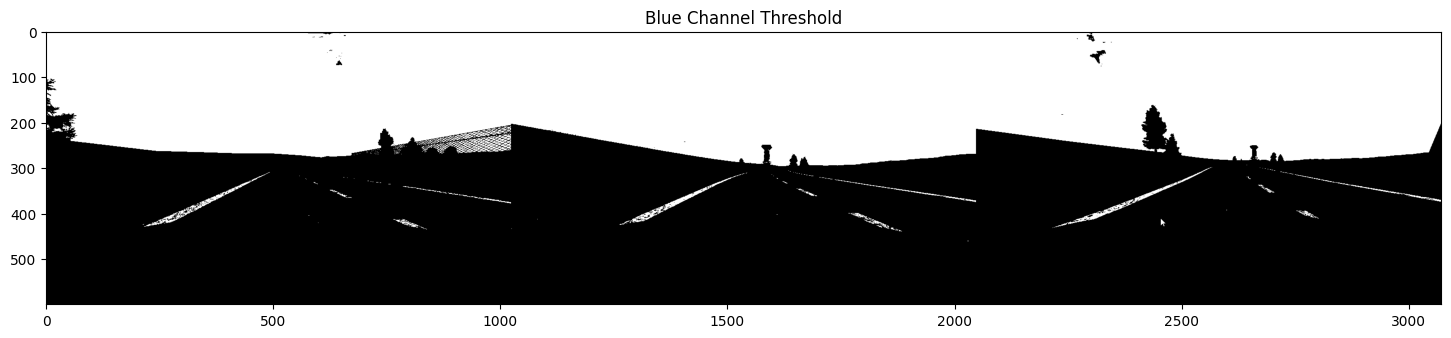

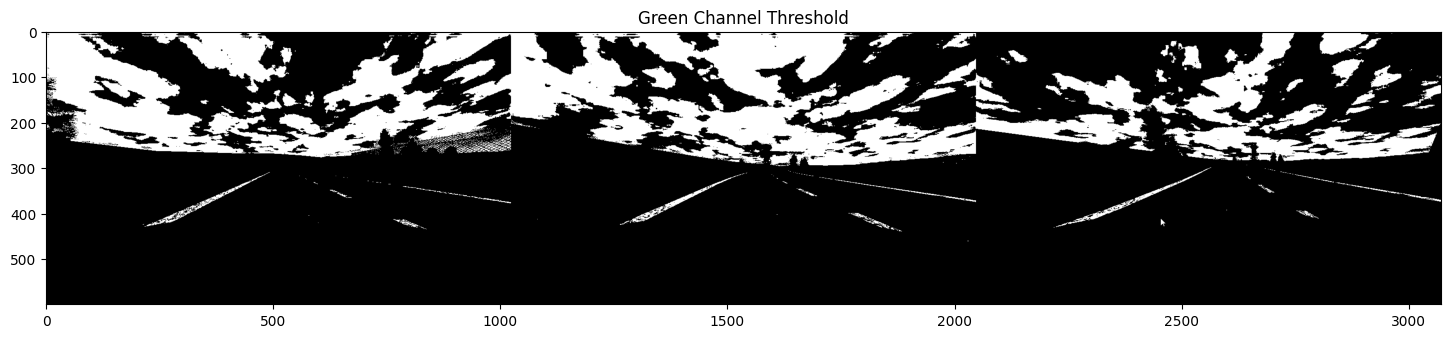

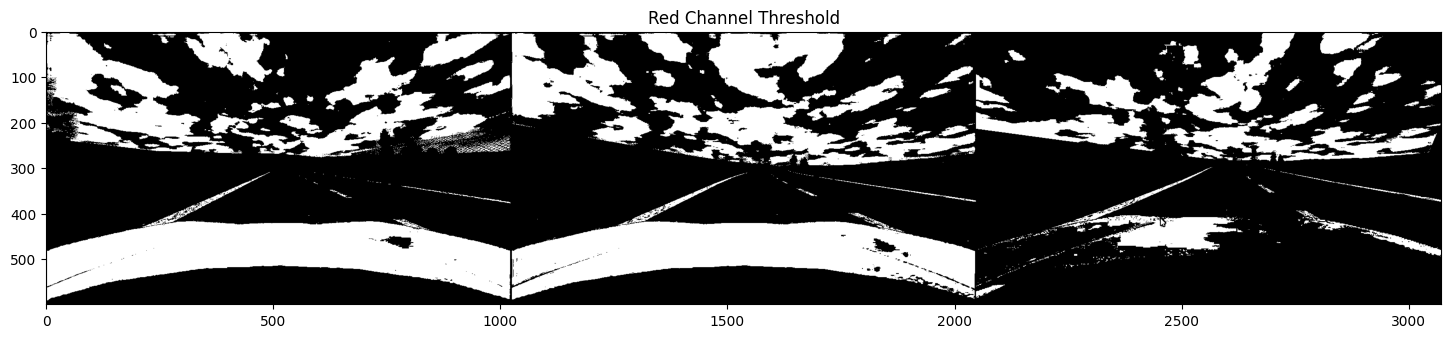

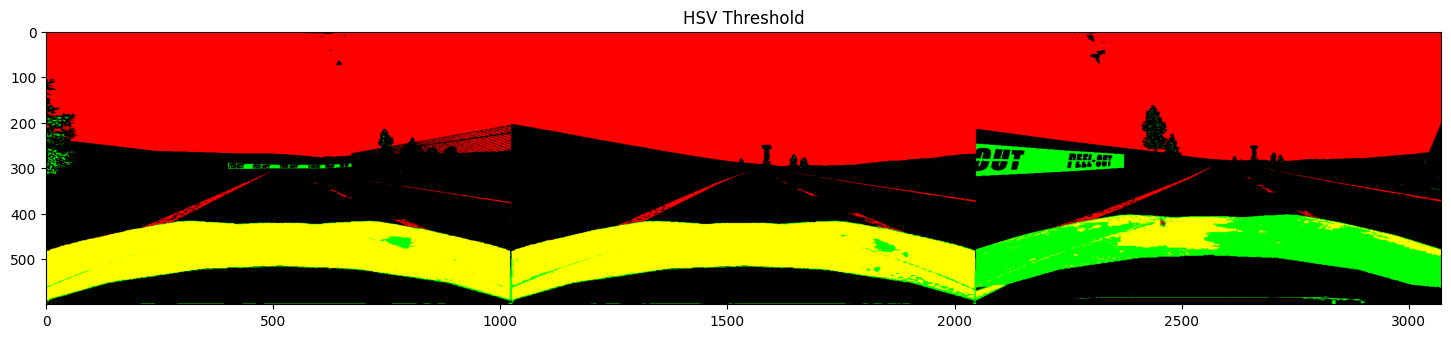

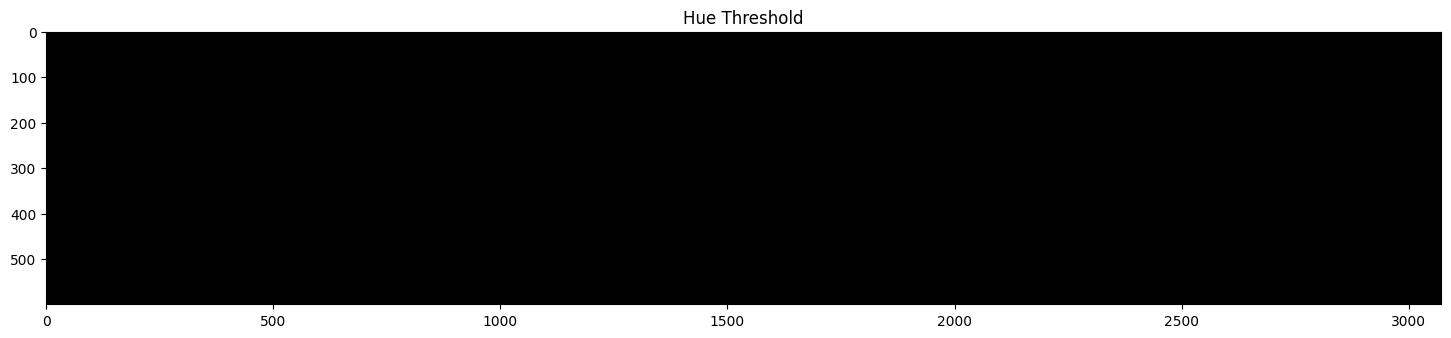

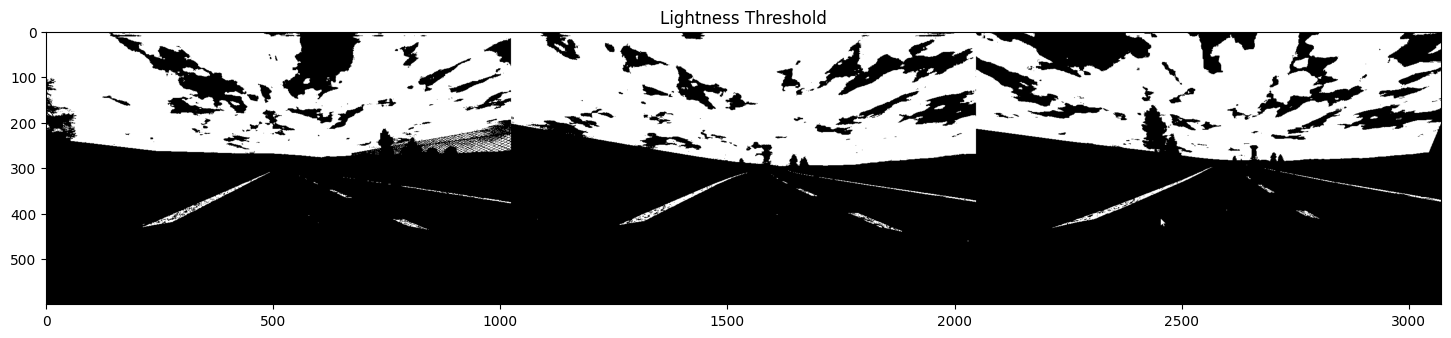

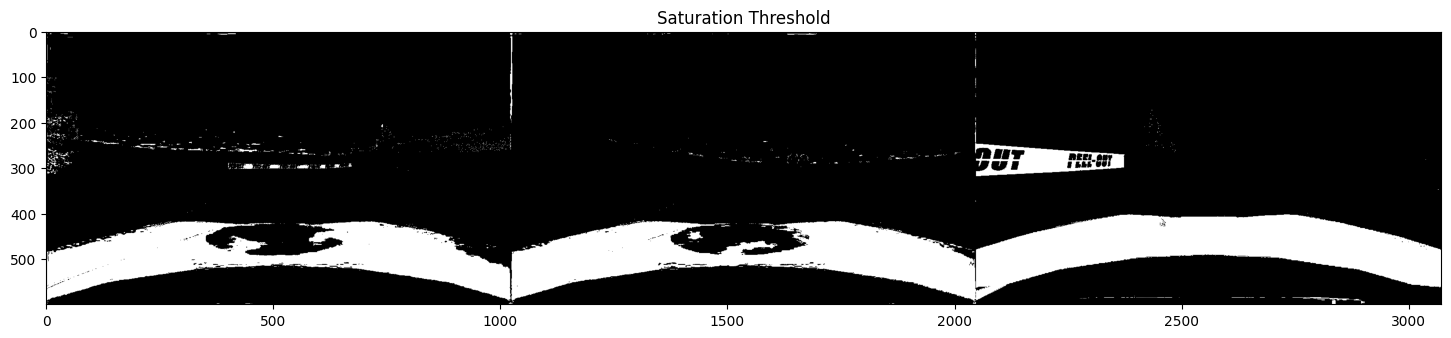

<Figure size 1800x600 with 0 Axes>

In [42]:
def applyThreshold(name, images, threshold):
    threshold_image = [np.zeros_like(image) for image in images]
    
    for index, image in enumerate(images):
        threshold_image[index][(image > threshold)] = 255
    mathplot_display_concatenated(name, threshold_image, "h")
    
    return threshold_image

blue_channel_threshold = applyThreshold("Blue Channel Threshold", blue_channel, 180)
green_channel_threshold = applyThreshold("Green Channel Threshold", green_channel, 180)
red_channel_threshold = applyThreshold("Red Channel Threshold", red_channel, 180)
hsv_images_threshold = applyThreshold("HSV Threshold", hsv_images, 180)
hue_images_threshold = applyThreshold("Hue Threshold", hue_images, 180)
lightness_images_threshold = applyThreshold("Lightness Threshold", lightness_images, 180)
saturation_images_threshold = applyThreshold("Saturation Threshold", saturation_images, 180)

# blue_channel_threshold = [np.zeros_like(image) for image in blue_channel]
# for index, image in enumerate(blue_channel):
#     blue_channel_threshold[index][(image > 180)] = 255
# print_ = mathplot_display_concatenated("Blue Channel Threshold", blue_channel_threshold, "h")

# green_channel_threshold = [np.zeros_like(image) for image in green_channel]
# for index, image in enumerate(green_channel):
#     green_channel_threshold[index][(image > 180)] = 255
# print_ = mathplot_display_concatenated("Green Channel Threshold", green_channel_threshold, "h")
